In [123]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import KMeans
import sklearn.cluster as cl
import itertools
from scipy.spatial import ConvexHull

/home/riku/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


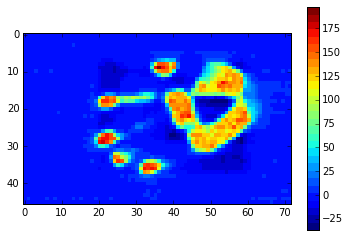

In [119]:
#img = np.load('testclosed.npy')
img = np.load('testclosed.npy')
plt.imshow(img, cm.get_cmap('jet', 30), interpolation='nearest')
plt.colorbar()

(46, 72)
[ 10   0 193 226 453 475 559 588 591 533 508 386 339 258 128  79  25]
[(10, 0), (10, 193), (10, 226), (10, 453), (10, 475), (10, 559), (10, 588), (10, 591), (10, 533), (10, 508), (10, 386), (10, 339), (10, 258), (10, 128), (10, 79), (10, 25), (0, 193), (0, 226), (0, 453), (0, 475), (0, 559), (0, 588), (0, 591), (0, 533), (0, 508), (0, 386), (0, 339), (0, 258), (0, 128), (0, 79), (0, 25), (193, 226), (193, 453), (193, 475), (193, 559), (193, 588), (193, 591), (193, 533), (193, 508), (193, 386), (193, 339), (193, 258), (193, 128), (193, 79), (193, 25), (226, 453), (226, 475), (226, 559), (226, 588), (226, 591), (226, 533), (226, 508), (226, 386), (226, 339), (226, 258), (226, 128), (226, 79), (226, 25), (453, 475), (453, 559), (453, 588), (453, 591), (453, 533), (453, 508), (453, 386), (453, 339), (453, 258), (453, 128), (453, 79), (453, 25), (475, 559), (475, 588), (475, 591), (475, 533), (475, 508), (475, 386), (475, 339), (475, 258), (475, 128), (475, 79), (475, 25), (559, 58

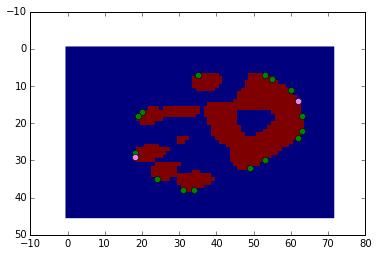

In [132]:
binarized = (np.sign(img-10)+1)/2
plt.imshow(binarized, interpolation='nearest')
print(binarized.shape)
points = []
for y in range(binarized.shape[0]):
    for x in range(binarized.shape[1]):
        if binarized[y,x]==1:
            points.append([y,x])
points = np.array(points)
hull = ConvexHull(points)
vertices = hull.vertices
print(hull.vertices)
plt.plot(points[hull.vertices,1],points[hull.vertices,0],'o', color='green')
distance = lambda x,y: (x[0]-y[0])**2+(x[1]-y[1])**2
print(list(itertools.combinations(hull.vertices, 2)))
axis = max(itertools.combinations(hull.vertices, 2), key=lambda x:distance(points[x[0]], points[x[1]]))
plt.plot(points[axis,1],points[axis,0],'o', color='violet')
ward = cl.AgglomerativeClustering(n_clusters=6, linkage='ward').fit(points)
label = ward.labels_

#for l in np.unique(label):
#    plt.plot(points[label == l, 1], points[label == l, 0], 'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)))
#plt.imshow(copy, interpolation='nearest')

In [ ]:
t = 2
def dfs(img, x, y, label):
    if (img[x,y]!=1):
        return
    else:
        img[x,y] = label
        dfs(img, x-1,y, label)
        dfs(img, x+1,y, label)
        dfs(img, x,y-1, label)
        dfs(img, x,y+1, label)
        dfs(img, x-1,y-1, label)
        dfs(img, x-1,y+1, label)
        dfs(img, x+1,y-1, label)
        dfs(img, x+1,y+1, label)
copy = np.copy(binarized)
for x in range(binarized.shape[0]):
    for y in range(binarized.shape[1]):
        if copy[x,y]==1:
            dfs(copy, x, y, t)
            t+=1
print(t-2)

In [6]:
import ftd2xx as FT
import sys
import numpy as np
crcTable = [
  0x0000,0x1021,0x2042,0x3063,0x4084,0x50A5,0x60C6,0x70E7,
  0x8108,0x9129,0xA14A,0xB16B,0xC18C,0xD1AD,0xE1CE,0xF1EF,
  0x1231,0x0210,0x3273,0x2252,0x52B5,0x4294,0x72F7,0x62D6,
  0x9339,0x8318,0xB37B,0xA35A,0xD3BD,0xC39C,0xF3FF,0xE3DE,
  0x2462,0x3443,0x0420,0x1401,0x64E6,0x74C7,0x44A4,0x5485,
  0xA56A,0xB54B,0x8528,0x9509,0xE5EE,0xF5CF,0xC5AC,0xD58D,
  0x3653,0x2672,0x1611,0x0630,0x76D7,0x66F6,0x5695,0x46B4,
  0xB75B,0xA77A,0x9719,0x8738,0xF7DF,0xE7FE,0xD79D,0xC7BC,
  0x48C4,0x58E5,0x6886,0x78A7,0x0840,0x1861,0x2802,0x3823,
  0xC9CC,0xD9ED,0xE98E,0xF9AF,0x8948,0x9969,0xA90A,0xB92B,
  0x5AF5,0x4AD4,0x7AB7,0x6A96,0x1A71,0x0A50,0x3A33,0x2A12,
  0xDBFD,0xCBDC,0xFBBF,0xEB9E,0x9B79,0x8B58,0xBB3B,0xAB1A,
  0x6CA6,0x7C87,0x4CE4,0x5CC5,0x2C22,0x3C03,0x0C60,0x1C41,
  0xEDAE,0xFD8F,0xCDEC,0xDDCD,0xAD2A,0xBD0B,0x8D68,0x9D49,
  0x7E97,0x6EB6,0x5ED5,0x4EF4,0x3E13,0x2E32,0x1E51,0x0E70,
  0xFF9F,0xEFBE,0xDFDD,0xCFFC,0xBF1B,0xAF3A,0x9F59,0x8F78,
  0x9188,0x81A9,0xB1CA,0xA1EB,0xD10C,0xC12D,0xF14E,0xE16F,
  0x1080,0x00A1,0x30C2,0x20E3,0x5004,0x4025,0x7046,0x6067,
  0x83B9,0x9398,0xA3FB,0xB3DA,0xC33D,0xD31C,0xE37F,0xF35E,
  0x02B1,0x1290,0x22F3,0x32D2,0x4235,0x5214,0x6277,0x7256,
  0xB5EA,0xA5CB,0x95A8,0x8589,0xF56E,0xE54F,0xD52C,0xC50D,
  0x34E2,0x24C3,0x14A0,0x0481,0x7466,0x6447,0x5424,0x4405,
  0xA7DB,0xB7FA,0x8799,0x97B8,0xE75F,0xF77E,0xC71D,0xD73C,
  0x26D3,0x36F2,0x0691,0x16B0,0x6657,0x7676,0x4615,0x5634,
  0xD94C,0xC96D,0xF90E,0xE92F,0x99C8,0x89E9,0xB98A,0xA9AB,
  0x5844,0x4865,0x7806,0x6827,0x18C0,0x08E1,0x3882,0x28A3,
  0xCB7D,0xDB5C,0xEB3F,0xFB1E,0x8BF9,0x9BD8,0xABBB,0xBB9A,
  0x4A75,0x5A54,0x6A37,0x7A16,0x0AF1,0x1AD0,0x2AB3,0x3A92,
  0xFD2E,0xED0F,0xDD6C,0xCD4D,0xBDAA,0xAD8B,0x9DE8,0x8DC9,
  0x7C26,0x6C07,0x5C64,0x4C45,0x3CA2,0x2C83,0x1CE0,0x0CC1,
  0xEF1F,0xFF3E,0xCF5D,0xDF7C,0xAF9B,0xBFBA,0x8FD9,0x9FF8,
  0x6E17,0x7E36,0x4E55,0x5E74,0x2E93,0x3EB2,0x0ED1,0x1EF0,
]

def crc16(packet):
    rem = 0
    for p in packet:
        #print("%04X %02X %04X" % (rem,p,crcTable[(rem>>8) ^ p]))
        rem = (rem << 8) ^ crcTable[(rem>>8) ^ p]
        rem = rem & 0xFFFF
    return rem

class SensorInterface(object):
    def __init__(self):
        self.sensor = None
        self.buffer = []

    def connect(self, id=None):
        """Connects to a sensor

        Use the optional id argument to specify a non-default sensor"""
        if id == None:
            id = 0;
        try:
            self.sensor = FT.open(id)
        except FT.DeviceError:
            print("Error: Device not found")
            raise

        self.sensor.setUSBParameters(8192)
        self.sensor.setLatencyTimer(2)
    def close(self):
        "Closes the connection to the sensor"
        if self.sensor:
            self.sensor.close()
        self.sensor = None

    def getAllImages(self):
        "Returns a list of all images found in the FTDI buffer"
        self.readBuffer()
        images = []
        while True:
            p = self.getPacket()
            if not p:
                return images
            if p[0] == 2: # image packet
                rows = p[14]
                cols = p[15]
                imgBuf = p[16:]
                pixels = []
                for i in range(rows):
                    pixels.append(imgBuf[(i*cols):((i+1)*cols)])
                img = { 'timeStamp' : p[5] + (p[6] << 16),
                        'sequence' : p[10],
                        'rows' : rows,
                        'cols' : cols,
                        'image' : pixels }
                images.append(img)

    def getPacket(self):
        while True:
            if len(self.buffer) == 0:
                return None

            # find BOM: 7 FFs followed by A5
            ffCount = 0
            while len(self.buffer) > 0:
                b = self.buffer.pop(0)
                if b == 0xFF:
                    ffCount += 1
                    if ffCount == 15:
                        print("Warning: Sensor buffer overflow")
                elif ffCount >= 7 and b == 0xA5:
                    break
                else:
                    ffCount == 0

            # Read length word
            if len(self.buffer) < 2:
                print("Discarded packet because buffer is empty")
                continue

            length = self.buffer[1] + (self.buffer[0] << 8)
            if length > len(self.buffer):
                # Allow this packet to be processed next time
                self.buffer.insert(0, 0xA5)
                for i in range(7):
                    self.buffer.insert(0, 0xFF)
                return None

            if length < 32:
                print("Discarded packet shorter than minimum (%d bytes vs 32 bytes)" % (length))
                continue # packet is shorter than minimum size

            packet = self.buffer[0:length]

            calcCrc = crc16(packet[4:])
            txCrc = packet[3] + (packet[2] << 8)
            if calcCrc != txCrc:
                print("Warning: Transmitted CRC %04X != %04X Calculated" % (txCrc, calcCrc))
                continue
            packet = self.removeEscapedFFs(packet)

            # convert packet to words from bytes
            lo = packet[5::2]
            hi = packet[4::2]
            packet = [lo[i] + (hi[i] << 8) for i in range(len(lo))]

            # accept the packet, remove it from buffer
            self.buffer[0:length] = []
            # print("Accepting packet, %d bytes long" % length)
            return packet

    def removeEscapedFFs(self, packet):
        # packets have 00 bytes inserted after each 4 FFs because
        # strings of FFs are used by hardware for signaling purposes
        i = 4
        while i < len(packet)-4:
            if packet[i] != 0xFF or packet[i+1] != 0xFF or packet[i+2] != 0xFF or packet[i+3] != 0xFF:
                i += 1
                continue
            print(packet[i+4])
            if packet[i+4] != 0:
                print("Warning, saw incorrect escape in FF sequence: %d" % packet[i+4])
            del packet[i+4]
            i += 1
        return packet

    def readBuffer(self):
        if not self.sensor:
            return
        # flush out buffer so we don't get old images
        rx = 65536
        while rx == 65536:
            (rx, tx, stat) = self.sensor.getStatus()
            buf = self.sensor.read(rx)
            # print("Read %d bytes" % len(buf))
            if rx == 65536:
                print("Discarding buffer...")

        if sys.version_info[0] < 3:
            buf = [ord(x) for x in buf]
        self.buffer.extend(buf)

In [7]:
sensor = SensorInterface()
try:
    sensor.connect()
except:
    print("Error connecting to sensor")
    raise
try:
    while True:
        images = sensor.getAllImages()
        if len(images)>0:
            img = images[-1]
            image = img['image']
            rows = img['rows']
            cols = img['cols']
            for y in range(rows):
                s = ''
                for x in range(cols):
                    if image[y][x]>1:
                        s+='1'
                    else:
                        s+='0'
                print(s)
except KeyboardInterrupt:
    pass

Error: Device not found
Error connecting to sensor


DeviceError: DEVICE_NOT_OPENED